In [1]:
from urllib2 import Request, urlopen, HTTPError
from urlparse import urlunparse, urlparse
import json 
import pandas as pd
import requests
import requests_cache
from bs4 import BeautifulSoup
requests_cache.install_cache("project141G")

import numpy as np
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
url='https://content.guardianapis.com/search?&page-size=50&from-date=2017-02-22&to-date=2017-02-28&format=json&order-by=oldest&api-key=20f08744-f78f-4c02-a35a-6b0772781ed7'
response=requests.get(url)
#response.json()['response']['results'][0]['webUrl']
response.json()

{u'response': {u'currentPage': 1,
  u'orderBy': u'oldest',
  u'pageSize': 50,
  u'pages': 36,
  u'results': [{u'apiUrl': u'https://content.guardianapis.com/crosswords/cryptic/27127',
    u'id': u'crosswords/cryptic/27127',
    u'isHosted': False,
    u'sectionId': u'crosswords',
    u'sectionName': u'Crosswords',
    u'type': u'crossword',
    u'webPublicationDate': u'2017-02-22T00:00:18Z',
    u'webTitle': u'Cryptic crossword No 27,127',
    u'webUrl': u'https://www.theguardian.com/crosswords/cryptic/27127'},
   {u'apiUrl': u'https://content.guardianapis.com/crosswords/quick/14600',
    u'id': u'crosswords/quick/14600',
    u'isHosted': False,
    u'sectionId': u'crosswords',
    u'sectionName': u'Crosswords',
    u'type': u'crossword',
    u'webPublicationDate': u'2017-02-22T00:00:18Z',
    u'webTitle': u'Quick crossword No 14,600',
    u'webUrl': u'https://www.theguardian.com/crosswords/quick/14600'},
   {u'apiUrl': u'https://content.guardianapis.com/society/2017/feb/22/child-victim

In [3]:
def url_perpage(page,pagesize='50',fromdate='2017-02-22',todate='2017-02-28',form='json',order='oldest',key='20f08744-f78f-4c02-a35a-6b0772781ed7'):
    url='https://content.guardianapis.com/search'
    response=requests.get(url,params={'page':page,'page-size':pagesize,'from-date':fromdate,'to-date':todate,'format':form,'order-by':order,'api-key':key})
    return [x['webUrl'] for x in response.json()['response']['results']]

urllist=[]
for page in range(1,37):
    urllist=urllist+url_perpage(page)
    
    
len(urllist)

1760

In [4]:
urllist

[u'https://www.theguardian.com/crosswords/cryptic/27127',
 u'https://www.theguardian.com/crosswords/quick/14600',
 u'https://www.theguardian.com/society/2017/feb/22/child-victims-of-violent-and-sexual-crimes-not-being-taken-seriously',
 u'https://www.theguardian.com/uk-news/2017/feb/22/mystery-male-black-death-victims-found-buried-hand-in-hand',
 u'https://www.theguardian.com/world/2017/feb/22/uk-hotels-fail-food-hygiene-inspections-which',
 u'https://www.theguardian.com/uk-news/2017/feb/22/celebrate-new-britons-citizenship-glastonbury-fa-cup-final-tory-group',
 u'https://www.theguardian.com/world/2017/feb/22/toxic-political-agenda-dehumanising-entire-groups-amnesty-warns',
 u'https://www.theguardian.com/politics/2017/feb/22/david-miliband-assault-foreign-aid-spend-populism-worst',
 u'https://www.theguardian.com/politics/2017/feb/22/street-parties-planned-uk-memory-murdered-mp-jo-cox',
 u'https://www.theguardian.com/society/2017/feb/22/disabled-children-in-england-finding-it-increasing

In [5]:
def getcontent(url):
    """
    Extract the title, text, and author of an Aggie article
    Input: url-> url for the article. 
    Output: a dictionary that contains the author, text, url and title.       
    """
    artic= requests.get(url)
    soup=BeautifulSoup(artic.text)
    try:
        text=" ".join([i.text.strip() for i in soup.find_all('div',itemprop='articleBody')[0].find_all('p')])
        text=text.translate({ 0x2018:0x27, 0x2019:0x27, 0x201C:0x22, 0x201D:0x22, 0x2026:0x20 })
    except (IndexError,TypeError):
        text=''
    return text

In [6]:
a=' '.join([getcontent(link) for link in urllist])
a

C:\Users\xiaogaga\Anaconda2\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file C:\Users\xiaogaga\Anaconda2\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


u'  Child victims of violent and sexual crimes are not being taken seriously when they report offences, the victims\' commissioner for England and Wales has said. In a review into young victims of crime, Lady Newlove says children who seek help from criminal justice agencies are often not believed, made to feel like criminals and accused of wasting police time. The report, published on Wednesday, concludes that despite high-profile inquiries into child abuse in Rotherham and the Jimmy Savile scandal "lessons are still not being learnt about believing young victims". Newlove said: "These children and young victims feel let down by the system that is meant to protect them. It is time attitudes towards them were changed. "I want to see agencies working together to make sure young and vulnerable victims feel supported through the criminal justice process. They deserve to be taken seriously, for their allegations to be thoroughly investigated and to be treated with dignity and respect." The

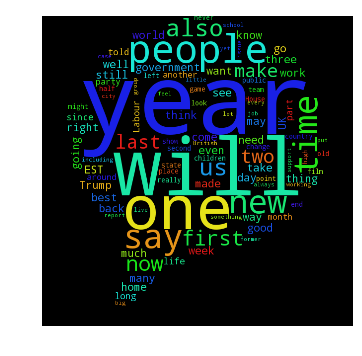

In [32]:
from os import path
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from scipy.misc import imread
t1_mask = imread("111.jpg")
stopwords=set(STOPWORDS)
stopwords.add("said")

wordcloud = WordCloud(max_words=100, mask=t1_mask,stopwords=stopwords).generate(a)
# Open a plot of the generated image.
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [8]:
content=pd.DataFrame()
for link in urllist:
    content=content.append(pd.DataFrame({'text':[getcontent(link)]}),ignore_index=True)
content

text
0                                                      
1                                                      
2     Child victims of violent and sexual crimes are...
3     The skeletons of two men who were buried appar...
4     Hundreds of hotels in Britain have failed thei...
5     Mass citizenship ceremonies should be held at ...
6     Toxic political rhetoric with echoes of 1930s ...
7     The media-led assault on the British aid budge...
8     Street parties, picnics and bake-offs will be ...
9     Families of children with disabilities and com...
10    Ministers are choosing to give billions of pou...
11    The NHS 111 telephone advice service is sendin...
12    Pep Guardiola said Manchester City will be eli...
13    The governor of the Reserve Bank says it is di...
14    Emmanuel Macron, the centrist candidate for th...
15    The head of Amnesty International in Australia...
16    Centrelink's controversial debt recovery syste...
17    "I just need a letter to say I am fit to fly,"...
18    Queensland Nickel's special purpose liquidator...
19    A suicide attack near the Iraqi city of Mosul,...
20    A new paper shows that the ancient ancestors o...
21    Julie Bishop says there was no request for an ...
22    At 61, the Victorian singer-songwriter Archie ...
23    The Australian federal police professional sta...
24    A group of New South Wales farmers fear that t...
25    Coca-Cola Amatil has announced the closure of ...
26    Western Sydney Wanderers' active supporter gro...
27    It looks like something out of a Hollywood dis...
28    Angelina Jolie has paid tribute to the survivo...
29    Fairfax Media will continue to print its daily...
...                                                 ...
1730  Ian Thorpe is on the eighth floor of ABC headq...
1731  Severe criticisms of Tunisian security forces ...
1732  Jonathan Joseph has been named in England's 27...
1733  An overhaul of the EU's flagship trading schem...
1734  Dyson, the technology company, is to undergo a...
1735  Betsy DeVos, the controversial newly appointed...
1736  Gordon Elliott knows for certain there is one ...
1737                                                   
1738  • An article about the loss of confidential me...
1739  The head of a national inquiry into Indigenous...
1740  Donald Trump on Tuesday signed an executive or...
1741  Anthony Vaccarello's mission to build his vers...
1742  A half-degree increase in the average temperat...
1743  A former CIA officer who was poised to become ...
1744  4.46pm EST\n16:46 We began this minute-by-minu...
1745  Centrelink's decision to release a welfare rec...
1746  David Haye has talked the required amount of t...
1747  Tom Curran, the uncapped Surrey seamer, descri...
1748  If you solved today's Guardian cryptic (and if...
1749  Jürgen Klopp has confirmed that Daniel Sturrid...
1750  Focus on Rory McIlroy's return after a seven-w...
1751  Amazon's S3 cloud service experienced an outag...
1752  New rules and a reset for the sport was the pl...
1753  Craig Shakespeare is set to be given the oppor...
1754  Donald Trump on Tuesday said that a spate of b...
1755  George Brandis has denied misleading the Senat...
1756                                                   
1757  Being overweight could increase the risk of a ...
1758  As Donald Trump prepares to issue his first ad...
1759  Donald Trump's nominee to oversee the US intel...

[1760 rows x 1 columns]

In [20]:
stemmer = PorterStemmer().stem
tokenize = nltk.word_tokenize
def stem(tokens,stemmer = PorterStemmer().stem):
    """
    stemmatize words
    Input: words
    Output: stemmer
    """
    return [stemmer(w.lower()) for w in tokens] 

def lemmatize(text):
    """
    Extract simple lemmas based on tokenization and stemming
    Input: string
    Output: list of strings (lemmata)
    """
    return stem(tokenize(text))

In [10]:
requests_cache.install_cache("project141111")

In [11]:
url="https://api.nytimes.com/svc/mostpopular/v2/mostviewed/all-sections/7/?api-key=e273ed2eb9f24e549143f627cc6ba4b1"
response=requests.get(url)
urllist=[response.json()[u'results'][i][u'url'] for i in range(len(response.json()[u'results']))]

In [12]:
def getcontent(url):
    """
    Extract the title, text, and author of an Aggie article
    Input: url-> url for the article. 
    Output: a dictionary that contains the author, text, url and title.       
    """
    artic= requests.get(url,"lxml")
    soup_arti=BeautifulSoup(artic.text)
    content=soup_arti.select("article[id='story'] > div[class='story-body-supplemental'] > div > p ")
    if content==[]:
        content=soup_arti.select("p[class='paragraph--story']")
    text=" ".join([i.text.strip() for i in content])
    return text

In [13]:
allcontent=[getcontent(i) for i in urllist]

In [14]:
df2=pd.DataFrame(allcontent)

In [15]:
df2.columns=['text']
df2

text
0   WASHINGTON — President Trump turned the power ...
1   WASHINGTON — President Trump on Wednesday resc...
2   WASHINGTON — President Trump has directed his ...
3   Not just one, but seven Earth-size planets tha...
4   I spent last week ignoring President Trump. Al...
5   WASHINGTON — Milo Yiannopoulos, a polemical Br...
6   LOS ANGELES — It’s one of Hollywood’s most sec...
7   If you were disappointed that Bill Maher broug...
8   PALM BEACH, Fla. — On Friday night, Fox News a...
9   OLATHE, Kan. — “The Jameson guys,” as some on ...
10  The confirmation of Betsy DeVos as secretary o...
11  PALM BEACH, Fla. — President Trump appointed L...
12  “Pop Icon Andy Warhol Dies After Routine Surge...
13  A week before Michael T. Flynn resigned as nat...
14  WASHINGTON — Reduced to their weakest state in...
15  In many ways she is the typical Broadway audie...
16  There is a mysterious hole in Lake Berryessa i...
17  WASHINGTON — President Trump’s newly appointed...
18  SAN FRANCISCO — When new employees join Uber, ...
19  LONDON — Swedes reacted with confusion, anger ...

In [18]:
df3=content.append(df2,ignore_index=True)
df3

text
0                                                      
1                                                      
2     Child victims of violent and sexual crimes are...
3     The skeletons of two men who were buried appar...
4     Hundreds of hotels in Britain have failed thei...
5     Mass citizenship ceremonies should be held at ...
6     Toxic political rhetoric with echoes of 1930s ...
7     The media-led assault on the British aid budge...
8     Street parties, picnics and bake-offs will be ...
9     Families of children with disabilities and com...
10    Ministers are choosing to give billions of pou...
11    The NHS 111 telephone advice service is sendin...
12    Pep Guardiola said Manchester City will be eli...
13    The governor of the Reserve Bank says it is di...
14    Emmanuel Macron, the centrist candidate for th...
15    The head of Amnesty International in Australia...
16    Centrelink's controversial debt recovery syste...
17    "I just need a letter to say I am fit to fly,"...
18    Queensland Nickel's special purpose liquidator...
19    A suicide attack near the Iraqi city of Mosul,...
20    A new paper shows that the ancient ancestors o...
21    Julie Bishop says there was no request for an ...
22    At 61, the Victorian singer-songwriter Archie ...
23    The Australian federal police professional sta...
24    A group of New South Wales farmers fear that t...
25    Coca-Cola Amatil has announced the closure of ...
26    Western Sydney Wanderers' active supporter gro...
27    It looks like something out of a Hollywood dis...
28    Angelina Jolie has paid tribute to the survivo...
29    Fairfax Media will continue to print its daily...
...                                                 ...
1750  Focus on Rory McIlroy's return after a seven-w...
1751  Amazon's S3 cloud service experienced an outag...
1752  New rules and a reset for the sport was the pl...
1753  Craig Shakespeare is set to be given the oppor...
1754  Donald Trump on Tuesday said that a spate of b...
1755  George Brandis has denied misleading the Senat...
1756                                                   
1757  Being overweight could increase the risk of a ...
1758  As Donald Trump prepares to issue his first ad...
1759  Donald Trump's nominee to oversee the US intel...
1760  WASHINGTON — President Trump turned the power ...
1761  WASHINGTON — President Trump on Wednesday resc...
1762  WASHINGTON — President Trump has directed his ...
1763  Not just one, but seven Earth-size planets tha...
1764  I spent last week ignoring President Trump. Al...
1765  WASHINGTON — Milo Yiannopoulos, a polemical Br...
1766  LOS ANGELES — It’s one of Hollywood’s most sec...
1767  If you were disappointed that Bill Maher broug...
1768  PALM BEACH, Fla. — On Friday night, Fox News a...
1769  OLATHE, Kan. — “The Jameson guys,” as some on ...
1770  The confirmation of Betsy DeVos as secretary o...
1771  PALM BEACH, Fla. — President Trump appointed L...
1772  “Pop Icon Andy Warhol Dies After Routine Surge...
1773  A week before Michael T. Flynn resigned as nat...
1774  WASHINGTON — Reduced to their weakest state in...
1775  In many ways she is the typical Broadway audie...
1776  There is a mysterious hole in Lake Berryessa i...
1777  WASHINGTON — President Trump’s newly appointed...
1778  SAN FRANCISCO — When new employees join Uber, ...
1779  LONDON — Swedes reacted with confusion, anger ...

[1780 rows x 1 columns]

In [23]:
df3['text']

0                                                        
1                                                        
2       Child victims of violent and sexual crimes are...
3       The skeletons of two men who were buried appar...
4       Hundreds of hotels in Britain have failed thei...
5       Mass citizenship ceremonies should be held at ...
6       Toxic political rhetoric with echoes of 1930s ...
7       The media-led assault on the British aid budge...
8       Street parties, picnics and bake-offs will be ...
9       Families of children with disabilities and com...
10      Ministers are choosing to give billions of pou...
11      The NHS 111 telephone advice service is sendin...
12      Pep Guardiola said Manchester City will be eli...
13      The governor of the Reserve Bank says it is di...
14      Emmanuel Macron, the centrist candidate for th...
15      The head of Amnesty International in Australia...
16      Centrelink's controversial debt recovery syste...
17      "I jus

In [24]:
vectorizer = TfidfVectorizer(tokenizer=lemmatize,stop_words="english",smooth_idf=True,norm=None)
A = vectorizer.fit_transform(df3['text'])
A

IndexError: string index out of range

In [ ]:
P=A.toarray()
K=P.dot(P.T)
U=np.triu(K,k=1)

In [ ]:
U

In [ ]:
V=U[0:1783,1783:]
V

In [ ]:
sort=np.sort(U,axis=None)
print np.where(U==sort[-1]), np.where(U==sort[-2]), np.where(U==sort[-3])

In [ ]:
np.argsort(U,axis=None)